In [ ]:
import pandas as pd
import math
import statsmodels.api as sm
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
files = ['2003_malaria_bse_totsp.csv', '2004_malaria_bse_totsp.csv', '2005_malaria_bse_totsp.csv', '2006_malaria_bse_totsp.csv', '2007malaria_bse_totsp.csv', '2008_malaria_bse_totsp.csv']
series = []
for f in files:
    df = pd.read_csv(f)
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for index, row in df.iterrows():
        for i in range(len(months)):
            if row['mnth'] == months[i]:
                if math.isnan(row['bsc']):
                    continue
                else:     
                    counts[i] += row['bsc']
    for c in counts:
        series.append(c)

FileNotFoundError: ignored

c:\users\snehr\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   72
Model:                 ARIMA(5, 1, 6)   Log Likelihood                -857.720
Date:                Tue, 16 Nov 2021   AIC                           1739.441
Time:                        19:25:06   BIC                           1766.593
Sample:                             0   HQIC                          1750.239
                                 - 72                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7759      0.108      7.199      0.000       0.565       0.987
ar.L2         -0.2617      0.168     -1.561      0.119      -0.590       0.067
ar.L3         -0.2993      0.131     -2.281      0.0

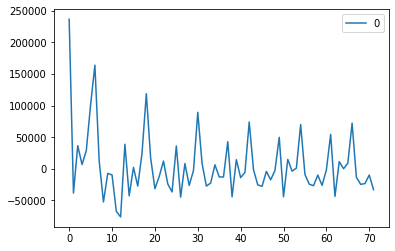

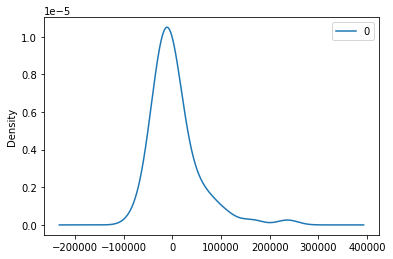

                   0
count      72.000000
mean     5019.212136
std     50421.887155
min    -75962.792885
25%    -25518.932138
50%     -4814.243845
75%     14645.194511
max    236612.000000


In [ ]:
model=sm.tsa.statespace.SARIMAX(endog=df['Sales'],order=(0,1,0),seasonal_order=(0,0,1,6),trend='c',enforce_invertibility=False)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())